In [537]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image

Le tecniche di pre-processing che son state adottate comprendono:
- Il ridimensionamento dell'immagine, in modo tale che tutte le immagini posseggano le stesse dimensioni
- Ho convertito l'immagine in scala di grigi
- Successivamente ho anche eseguito un miglioramento del contrasto tramite equalizzazione dell'istogramma --> aumentare il contrasto globale di un'immagine.

Il miglioramento del contrasto permette quindi di eseguire una sogliatura piú efficace, questo perché: L'equalizzazione "stira" l'istogramma, distribuendo i livelli di grigio su un range più ampio. Questo significa che le zone scure diventano più scure e le zone chiare più chiare, aumentando la differenza tra le due. Con un contrasto più elevato, i bordi tra le diverse regioni dell'immagine diventano più definiti, facilitando la loro individuazione tramite sogliatura. In alcuni casi, l'equalizzazione può aiutare a ridurre l'effetto del rumore presente nell'immagine, migliorando la qualità della segmentazione.


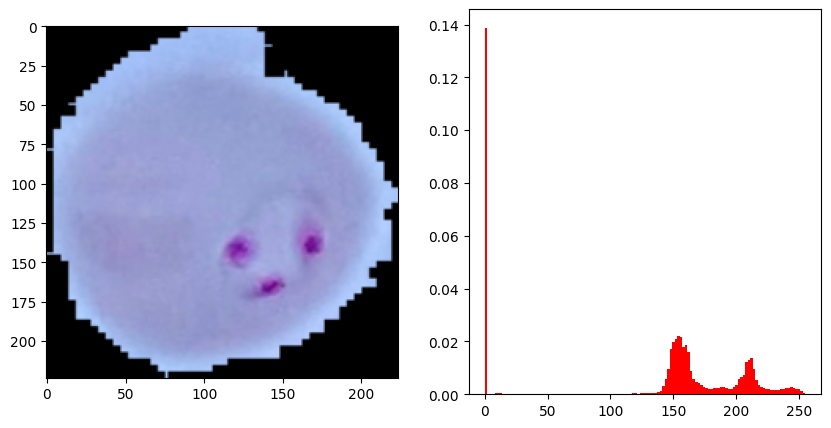

In [538]:
img = cv2.imread('FESI/Progetto/malaria/malaria/parasite (1).png', cv2.IMREAD_UNCHANGED)
resized = cv2.resize(img, (224, 224))

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(resized)


plt.subplot(1,2,2) 
plt.hist(resized.ravel(), bins=128, density=True, color='r')

plt.show()

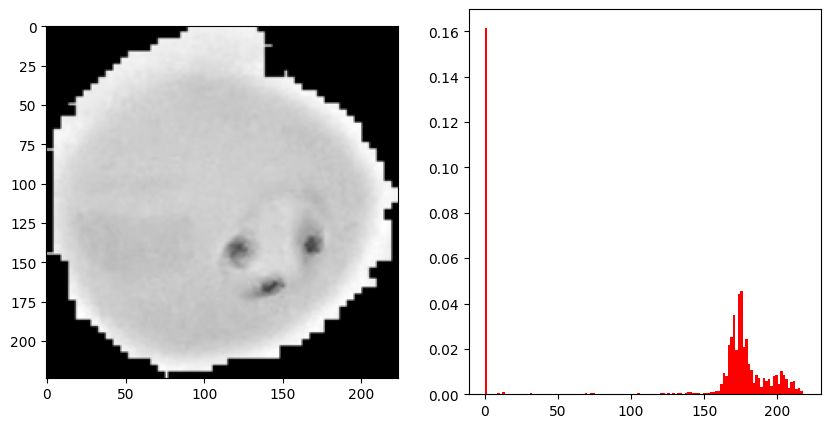

In [539]:
# Grayscale
img_gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(img_gray, cmap='gray')


plt.subplot(1,2,2) 
plt.hist(img_gray.ravel(), bins=128, density=True, color='r');

plt.show()

Cerco di applicare una sogliatura --> devo scegliere un valore adeguato per la soglia, altrimenti potrebbe capitare che se la soglia è troppo bassa, quasi tutti i pixel supereranno questo valore e l'immagine risultante sarà quasi completamente bianca.
Un idea puó essere applicare una prima sogliatura all'immagine ed ottenere una sorta di "maschera" per separare l'immagine dallo sfondo  

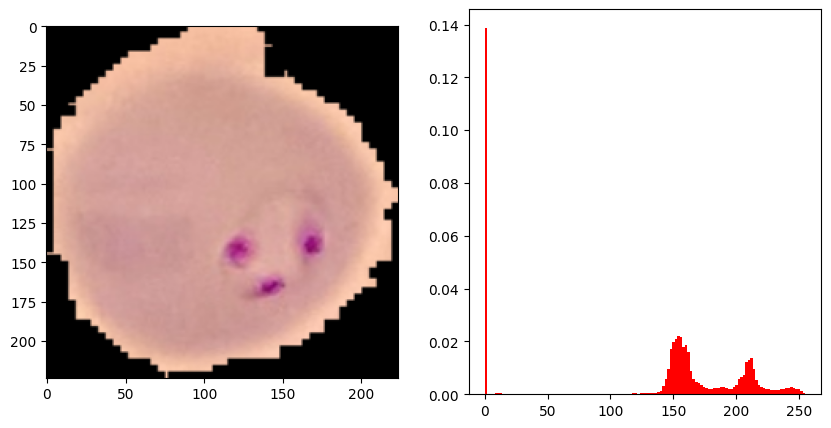

In [540]:
# Creo una maschera per rilevare il contenuto non nero e lo salvo in una immagine
_, mask = cv2.threshold(img_gray, 10, 255, cv2.THRESH_BINARY)
cv2.imwrite('FESI/Progetto/tests/maschera_invertita.png', mask)

# Carica l'immagine in bianco e nero
input_image = Image.open('FESI/Progetto/tests/maschera_invertita.png')  # Converti in scala di grigi

# Crea una nuova immagine con canale alfa (trasparenza)
output_image = Image.new("RGBA", input_image.size, (0, 0, 0, 0))  # Trasparente

# Itera sui pixel e conserva solo quelli neri
for x in range(input_image.width):
    for y in range(input_image.height):
        pixel = input_image.getpixel((x, y))
        if pixel == 0:  # Pixel nero
            output_image.putpixel((x, y), (255, 255, 255, 255))  # Nero opaco

# Salva il risultato come immagine PNG con trasparenza
output_image.save('FESI/Progetto/tests/immagine_solo_bianca.png')

new_mask = Image.open('FESI/Progetto/tests/immagine_solo_bianca.png')
resized_pillow = Image.fromarray(resized)

for x in range(new_mask.width):
    for y in range(new_mask.height):
        pixel = new_mask.getpixel((x, y))
        if pixel == 0:
            resized_pillow.putpixel((x,y), (255,255,255))


# Salva l'immagine risultante
resized_pillow.save('immagine_ritagliata.png')

result = cv2.imread('immagine_ritagliata.png')
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(result, cmap='gray')


plt.subplot(1,2,2) 
plt.hist(result.ravel(), bins=128, density=True, color='r');

plt.show()


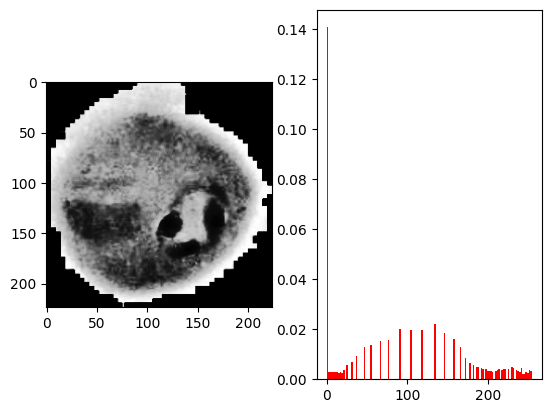

In [541]:
result_gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)

eq_img = cv2.equalizeHist(result_gray)

plt.subplot(1,2,1)
plt.imshow(eq_img, cmap='gray')

plt.subplot(1,2,2)
plt.hist(eq_img.ravel(), bins=128, density=True, color='r');
